In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('data/student.csv')


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['math_score', 'reading_score', 'writing_score']
Categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3


In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
df[['math_score', 'reading_score', 'writing_score', 'total_score', 'average_score']].describe()

,math_score,reading_score,writing_score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


EDA

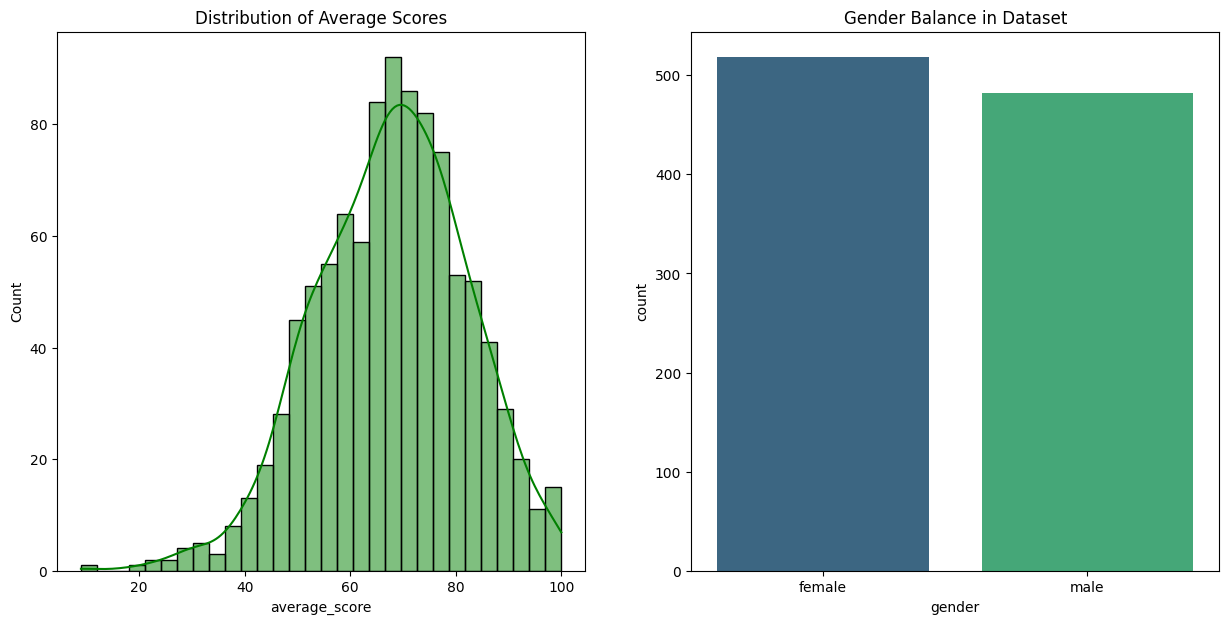

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Total Score Distribution
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g')
plt.title("Distribution of Average Scores")

# Check for imbalance in categories 
plt.subplot(122)
sns.countplot(data=df, x='gender', palette='viridis')
plt.title("Gender Balance in Dataset")

plt.show()

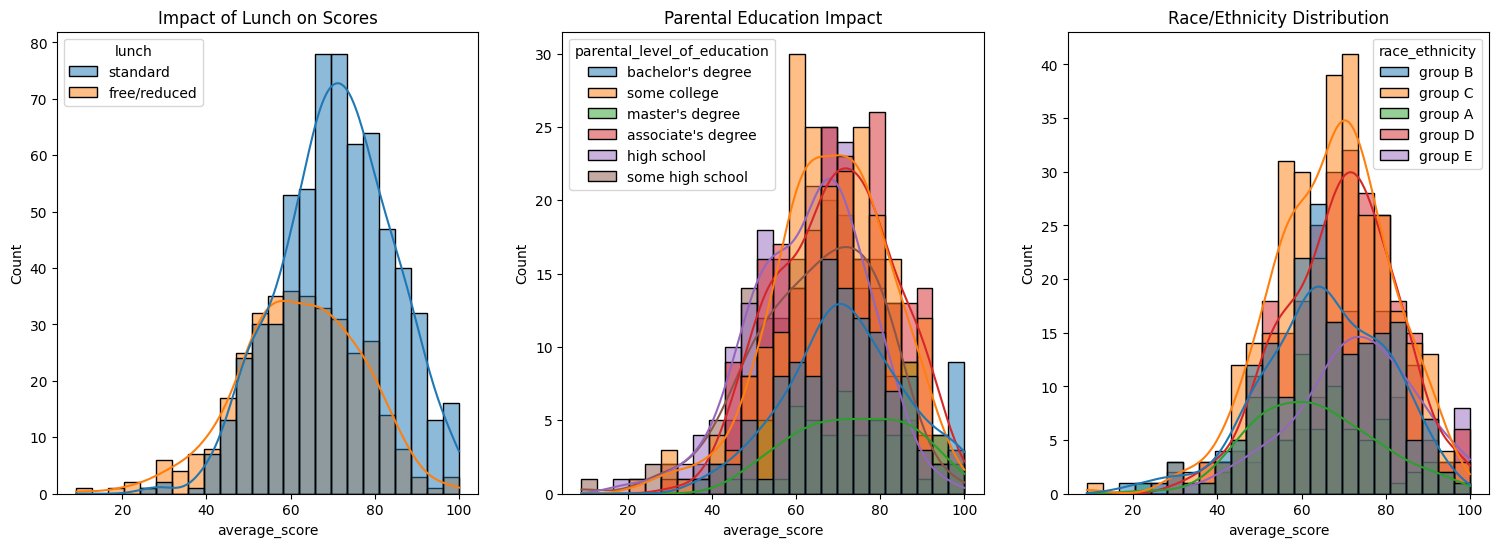

In [20]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.title("Impact of Lunch on Scores")

plt.subplot(142)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.title("Parental Education Impact")

plt.subplot(143)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.title("Race/Ethnicity Distribution")

plt.show()

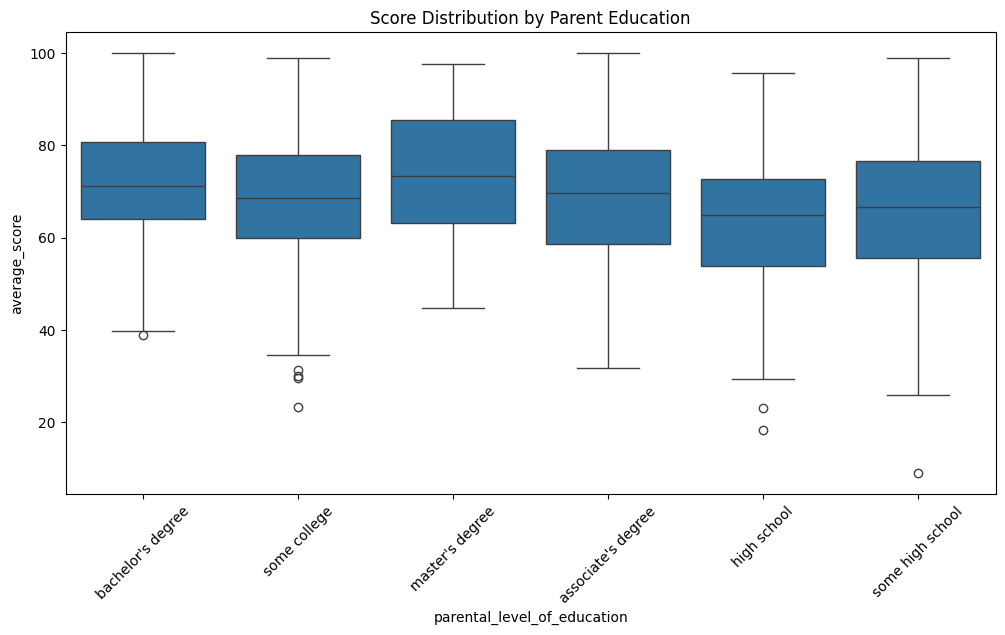

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental_level_of_education', y='average_score', data=df)
plt.xticks(rotation=45)
plt.title("Score Distribution by Parent Education")
plt.show()

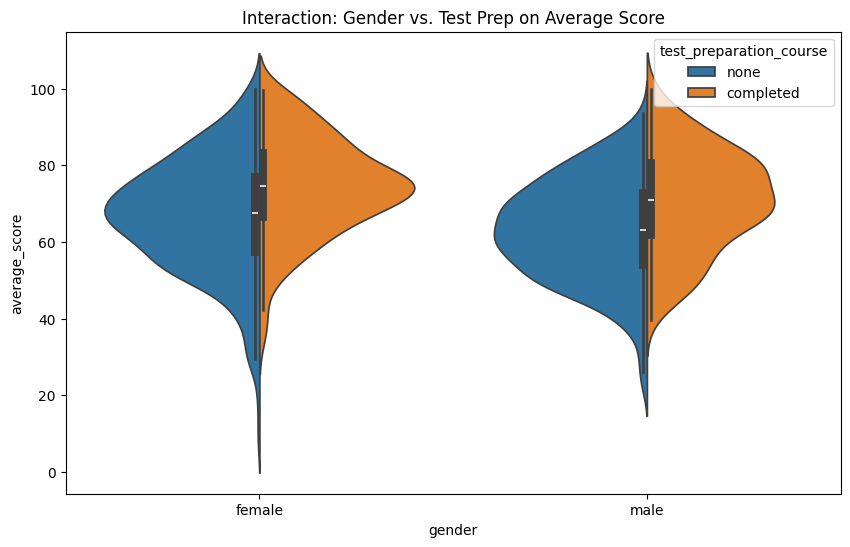

In [23]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='average_score', hue='test_preparation_course', data=df, split=True)
plt.title("Interaction: Gender vs. Test Prep on Average Score")
plt.show()

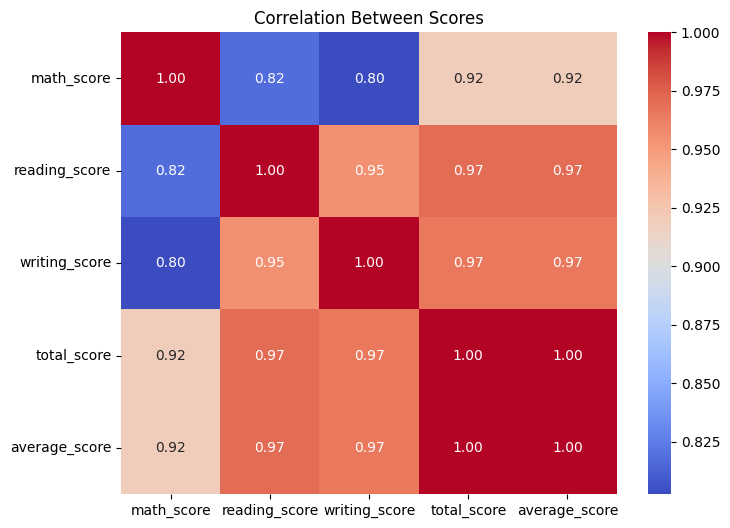

In [24]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Scores")
plt.show()

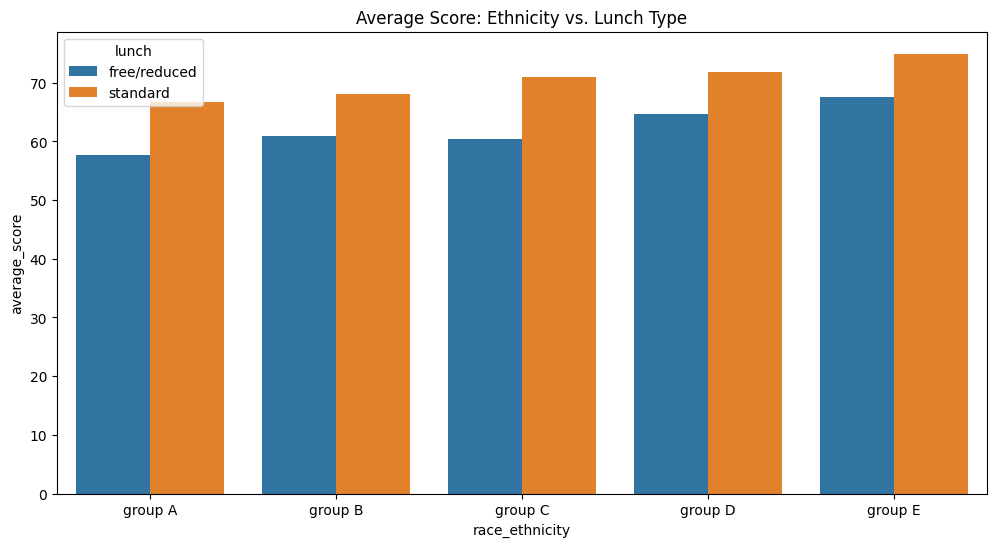

In [26]:
# Grouping by Ethnicity and Lunch to see the Average Score
group_performance = df.groupby(['race_ethnicity', 'lunch']).agg({'average_score': 'mean'}).reset_index()

# Plotting the result
plt.figure(figsize=(12, 6))
sns.barplot(data=group_performance, x='race_ethnicity', y='average_score', hue='lunch')
plt.title("Average Score: Ethnicity vs. Lunch Type")
plt.show()

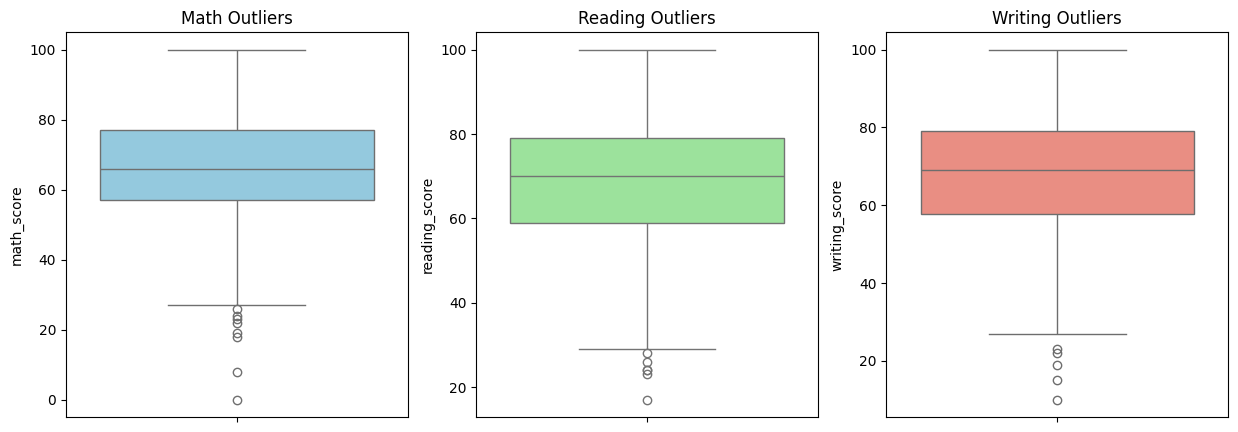

In [27]:
# Using Boxplots to see outliers in Math, Reading, and Writing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['math_score'], color='skyblue')
plt.title('Math Outliers')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['reading_score'], color='lightgreen')
plt.title('Reading Outliers')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['writing_score'], color='salmon')
plt.title('Writing Outliers')

plt.show()

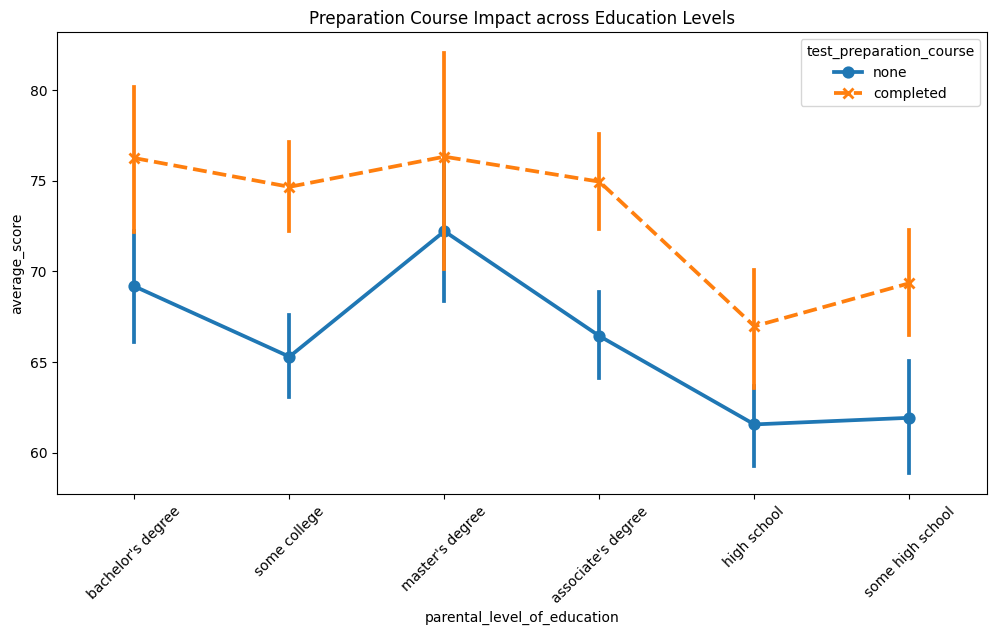

In [29]:
# Interaction between Preparation and Parental Education
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='parental_level_of_education', y='average_score', hue='test_preparation_course', markers=["o", "x"], linestyles=["-", "--"])
plt.xticks(rotation=45)
plt.title("Preparation Course Impact across Education Levels")
plt.show()

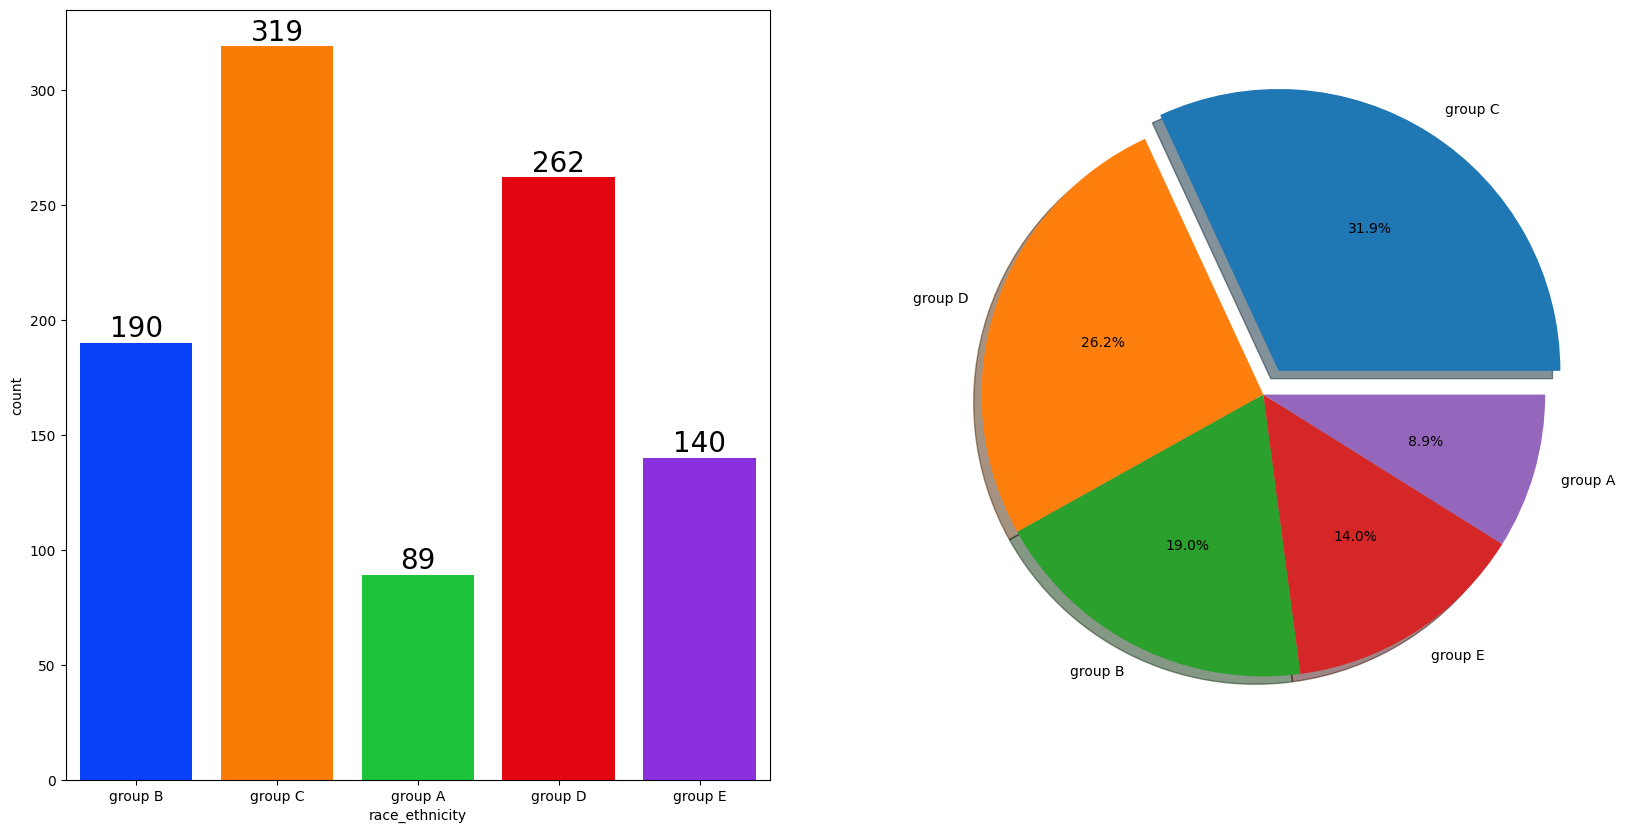

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

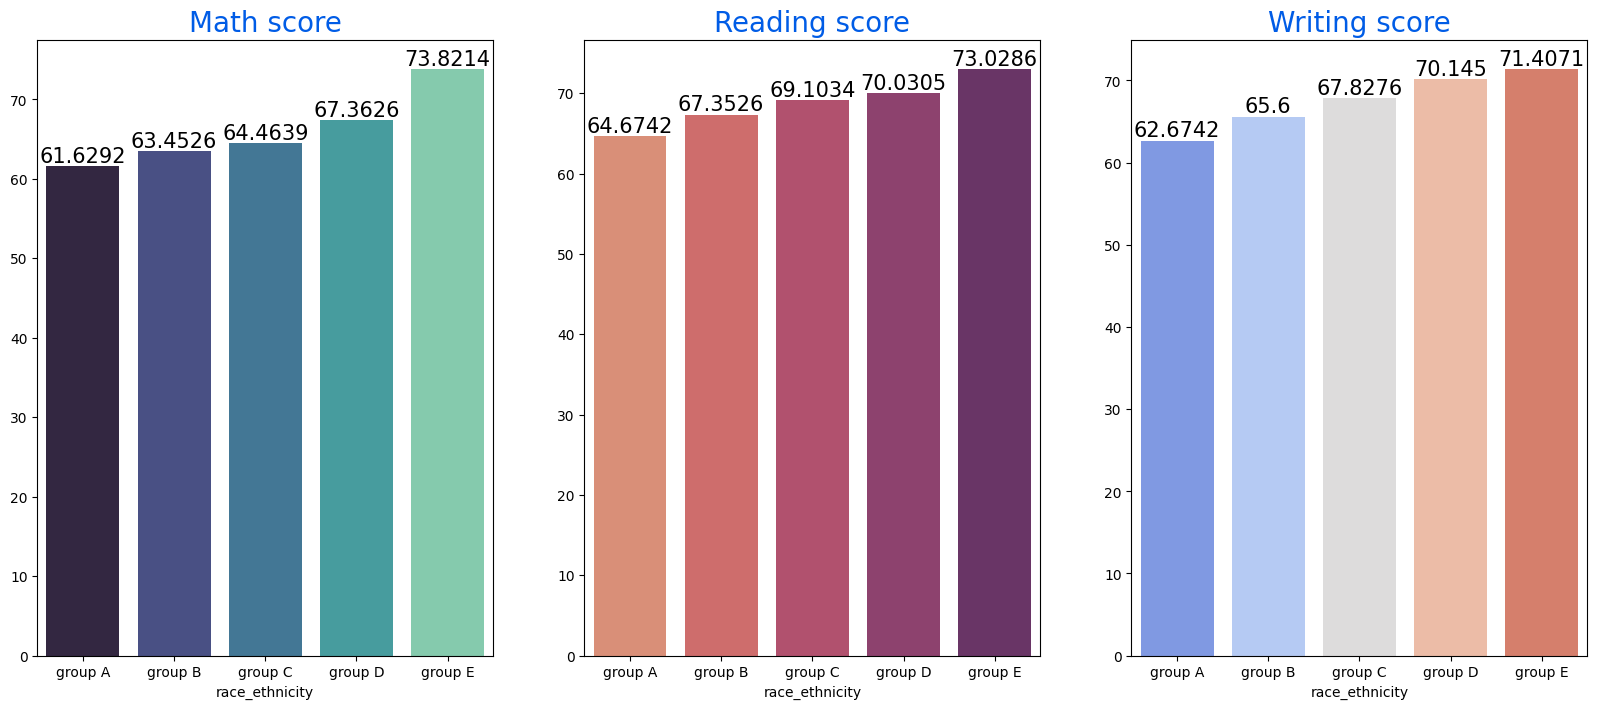

In [36]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

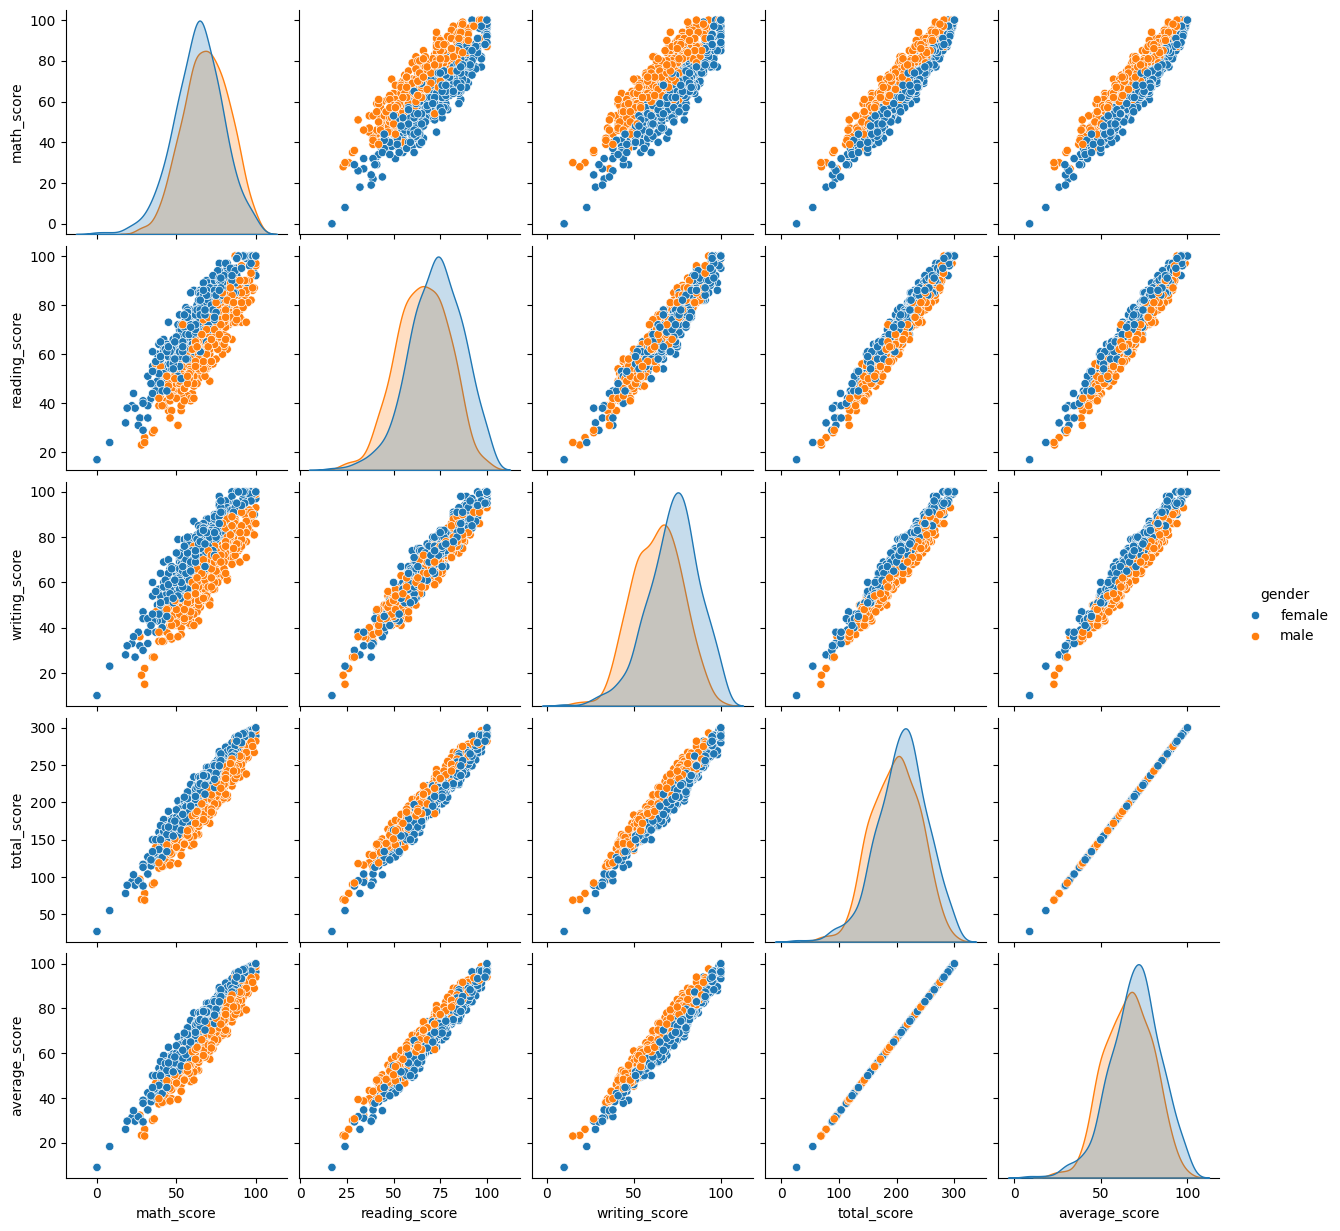

In [37]:
sns.pairplot(df,hue = 'gender')
plt.show()